In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline

In [2]:
df = pd.read_excel('Data for Paper.xlsx', index_col=0)
df.head()

,Date,Year,DatesAvailable,CrudeOilPrice,GoldPrice,NaturalGasPrice,SilverPrice
Month,,,,,,,
Aug,16,2019,"Aug 16, 2019",55.20,1532.45,2.215,17.203
Aug,15,2019,"Aug 15, 2019",54.78,1537.00,2.220,17.275
Aug,14,2019,"Aug 14, 2019",55.23,1527.80,2.143,17.280
Aug,13,2019,"Aug 13, 2019",57.10,1514.10,2.147,16.985
Aug,12,2019,"Aug 12, 2019",54.93,1517.20,2.105,17.071


In [3]:
df = df.drop(['Date', 'Year', 'NaturalGasPrice'], axis=1) # removing unnecessary columns
df.head()

,DatesAvailable,CrudeOilPrice,GoldPrice,SilverPrice
Month,,,,
Aug,"Aug 16, 2019",55.20,1532.45,17.203
Aug,"Aug 15, 2019",54.78,1537.00,17.275
Aug,"Aug 14, 2019",55.23,1527.80,17.280
Aug,"Aug 13, 2019",57.10,1514.10,16.985
Aug,"Aug 12, 2019",54.93,1517.20,17.071


In [4]:
df['DatesAvailable']= pd.to_datetime(df['DatesAvailable']) # converting 'DatesAvailable' to datetime
df.head()

,DatesAvailable,CrudeOilPrice,GoldPrice,SilverPrice
Month,,,,
Aug,2019-08-16,55.20,1532.45,17.203
Aug,2019-08-15,54.78,1537.00,17.275
Aug,2019-08-14,55.23,1527.80,17.280
Aug,2019-08-13,57.10,1514.10,16.985
Aug,2019-08-12,54.93,1517.20,17.071


In [5]:
df.set_index('DatesAvailable', inplace=True) # setting 'DatesAvailable' as index column
df.head()

,CrudeOilPrice,GoldPrice,SilverPrice
DatesAvailable,,,
2019-08-16,55.20,1532.45,17.203
2019-08-15,54.78,1537.00,17.275
2019-08-14,55.23,1527.80,17.280
2019-08-13,57.10,1514.10,16.985
2019-08-12,54.93,1517.20,17.071


In [6]:
df1 = pd.read_excel('S&P Futures.csv.xlsx', parse_dates = True, index_col=0)
df1.head()

,Price
Date,
2019-07-29,3021.75
2019-07-26,3024.50
2019-07-25,3006.50
2019-07-24,3021.50
2019-07-23,3008.00


In [7]:
DF = df1.loc['20190729':'20000104'] 
DF.head()

,Price
Date,
2019-07-29,3021.75
2019-07-26,3024.50
2019-07-25,3006.50
2019-07-24,3021.50
2019-07-23,3008.00


In [8]:
data = [DF,df] # combining dataframes
result = pd.concat(data, axis=1)
result.head()

,Price,CrudeOilPrice,GoldPrice,SilverPrice
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [9]:
result = result.rename(columns = {"Price": "Index"}) # renaming column
result.head() # display 

,Index,CrudeOilPrice,GoldPrice,SilverPrice
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [10]:
DATA = result.fillna(method ='pad') # filling the missing values with previous ones 
DATA.isnull().sum()

Index            0
CrudeOilPrice    0
GoldPrice        0
SilverPrice      0
dtype: int64

In [21]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5019 entries, 2000-01-04 to 2019-08-16
Data columns (total 4 columns):
Index            5019 non-null float64
CrudeOilPrice    5019 non-null float64
GoldPrice        5019 non-null float64
SilverPrice      5019 non-null float64
dtypes: float64(4)
memory usage: 356.1 KB


In [11]:
DATA.index.name = 'Date'
DATA.head()

,Index,CrudeOilPrice,GoldPrice,SilverPrice
Date,,,,
2000-01-04,1411.75,25.55,282.7,5.335
2000-01-05,1413.50,24.91,281.1,5.170
2000-01-06,1404.00,24.78,281.4,5.127
2000-01-07,1460.50,24.22,281.9,5.150
2000-01-10,1475.00,24.67,281.7,5.145


In [12]:
from talib import RSI, BBANDS

In [15]:
pip install pyti

Note: you may need to restart the kernel to use updated packages.


In [13]:
#import funcs
from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent_b

In [13]:
A = pd.DataFrame (DATA['CrudeOilPrice'])

In [14]:
A.head()

,CrudeOilPrice
Date,
2000-01-04,25.55
2000-01-05,24.91
2000-01-06,24.78
2000-01-07,24.22
2000-01-10,24.67


In [52]:
A.shape

(5019, 1)

### Moving average

In [14]:
A['ma_20'] = A.CrudeOilPrice.rolling(window=20).mean().fillna(0)
A['ma_100'] = A.CrudeOilPrice.rolling(window=100).mean().fillna(0)

### Volatility

In [15]:
A['std_20'] = DATA.CrudeOilPrice.rolling(window=20).std().fillna(0)
A['std_100'] = DATA.CrudeOilPrice.rolling(window=100).std().fillna(0)

### Relative strength index

In [16]:
A['rsi'] = RSI(DATA.CrudeOilPrice, timeperiod=14).fillna(0)

### Bollinger Bands

In [26]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


In [17]:
from ta import *
# Add bollinger band high indicator filling Nans values
#A['bb_high_indicator'] = bollinger_hband_indicator(DATA.CrudeOilPrice, n=20, ndev=2, fillna=True)
# Add bollinger band low indicator filling Nans values
#A['bb_low_indicator'] = bollinger_lband_indicator(DATA.CrudeOilPrice, n=20, ndev=2,fillna=True)


In [18]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = DATA['CrudeOilPrice'].rolling(window).mean()
rolling_std = DATA['CrudeOilPrice'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
A['Rolling Mean'] = rolling_mean.fillna(0)
A['Bollinger High'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
A['Bollinger Low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)

#### MACD: (12-day EMA - 26-day EMA)

In [19]:
A['26_ema'] = A.CrudeOilPrice.ewm(span=26).mean().fillna(0)
A['12_ema'] = A.CrudeOilPrice.ewm(span=12).mean().fillna(0)

In [20]:
A['macd'] = A['12_ema'] - A['26_ema']

### Commodity Channel Index (CCI)
CCI can be used to identify cyclical turns across asset classes
The CCI looks at the relationship between price and a moving average. Steps involved in the estimation of CCI include:
 - Computing the typical price for the security. 
 - Finding the moving average for the chosen number of days based on the typical price.
 - Computing the standard deviation for the same period as that used for the MA.

In [21]:
A['CCI'] = (DATA['CrudeOilPrice'].mean() - DATA['CrudeOilPrice'].rolling(window=20).mean().fillna(0)) /(0.015 * 26.382652)

In [22]:
A['Index'] = DATA['Index']
A['GoldPrice'] = DATA['GoldPrice']
A['SilverPrice'] = DATA['SilverPrice']
A.head()

,CrudeOilPrice,ma_20,ma_100,std_20,std_100,rsi,Rolling Mean,Bollinger High,Bollinger Low,26_ema,12_ema,macd,CCI,Index,GoldPrice,SilverPrice
Date,,,,,,,,,,,,,,,,
2000-01-04,25.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.550000,25.550000,0.000000,156.614459,1411.75,282.7,5.335
2000-01-05,24.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.217692,25.203333,-0.014359,156.614459,1413.50,281.1,5.170
2000-01-06,24.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.060434,25.038106,-0.022327,156.614459,1404.00,281.4,5.127
2000-01-07,24.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.825485,24.779862,-0.045623,156.614459,1460.50,281.9,5.150
2000-01-10,24.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.789428,24.750013,-0.039415,156.614459,1475.00,281.7,5.145


In [33]:
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu

### Mann-Whitney U Test

The default assumption or null hypothesis is that there is no difference between the distributions of the data samples. Rejection of this hypothesis suggests that there is likely some difference between the samples. More specifically, the test determines whether it is equally likely that any randomly selected observation from one sample will be greater or less than a sample in the other distribution. If violated, it suggests differing distributions.

 - Fail to Reject H0: Sample distributions are equal.
 - Reject H0: Sample distributions are not equal.

In [34]:
# compare samples
stat, p = mannwhitneyu(DATA.Index, DATA.CrudeOilPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


In [35]:
# compare samples
stat, p = mannwhitneyu(DATA.Index, DATA.GoldPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=6235225.500, p=0.000
Different distribution (reject H0)


In [36]:
# compare samples
stat, p = mannwhitneyu(DATA.Index, DATA.SilverPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


In [39]:
# compare samples
stat, p = mannwhitneyu(DATA.GoldPrice, DATA.SilverPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


In [40]:
# compare samples
stat, p = mannwhitneyu(DATA.CrudeOilPrice, DATA.SilverPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=539208.000, p=0.000
Different distribution (reject H0)


In [41]:
# compare samples
stat, p = mannwhitneyu(DATA.CrudeOilPrice, DATA.GoldPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)


### Kruskal-Wallis H Test
The default assumption or the null hypothesis is that all data samples were drawn from the same distribution. Specifically, that the population medians of all groups are equal. A rejection of the null hypothesis indicates that there is enough evidence to suggest that one or more samples dominate another sample, but the test does not indicate which samples or by how much.
 - Fail to Reject H0: All sample distributions are equal.
 - Reject H0: One or more sample distributions are not equal.

In [43]:
from scipy.stats import kruskal

# compare samples
stat, p = kruskal(DATA.Index, DATA.CrudeOilPrice, DATA.GoldPrice, DATA.SilverPrice)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=17260.462, p=0.000
Different distributions (reject H0)


In [22]:
from scipy import stats
# Show the results for Anova

F_statistic, pVal = stats.f_oneway(DATA.Index, DATA.CrudeOilPrice, DATA.GoldPrice, DATA.SilverPrice)
print ('P value:')
print (pVal)

P value:
0.0


In [ ]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(DATA['Index'],DATA['CrudeOilPrice'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

In [24]:
A.to_csv('A.csv', index=False)

In [23]:
y = A.CrudeOilPrice
X = A.drop(columns = ['CrudeOilPrice'])

In [93]:
X.shape

(4410, 15)

In [95]:
scaler = StandardScaler()
np_scaled = scaler.fit_transform(A)
data = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(A) 
df['anomaly2'] = pd.Series(model.predict(data))

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue', label = 'Normal')
ax.scatter(a['date_time_int'],a['price_usd'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

SyntaxError: invalid character in identifier (<ipython-input-95-19a49ab8255a>, line 4)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  4266 753
length of y_train and y_test:  4266 753


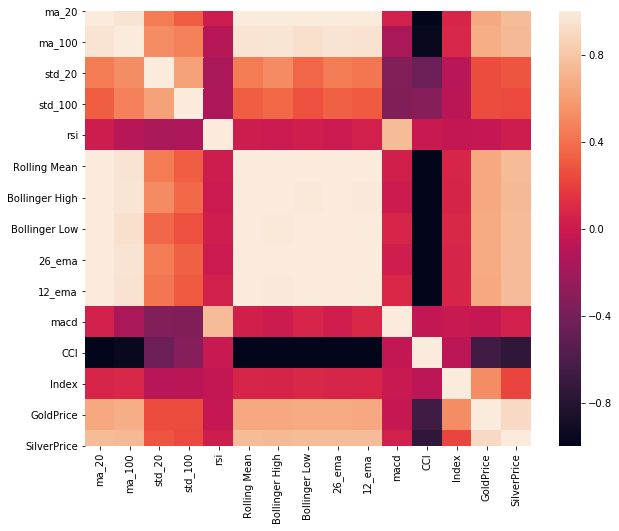

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr());

In [43]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [44]:
from sklearn.model_selection import cross_val_score

def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False, scale=1.96):
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=5, 
                                    scoring="neg_mean_squared_error")
        #mae = cv.mean() * (-1)
        deviation = np.sqrt(cv.std())
        
        lower = prediction - (scale * deviation)
        upper = prediction + (scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');
    



In [45]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(cv=5)
ridge.fit(X_train_scaled, y_train)



RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

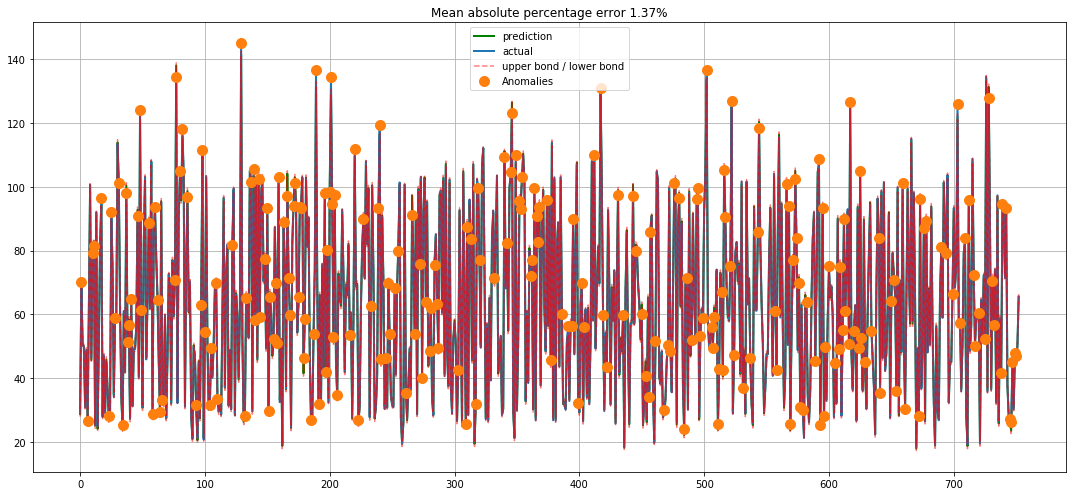

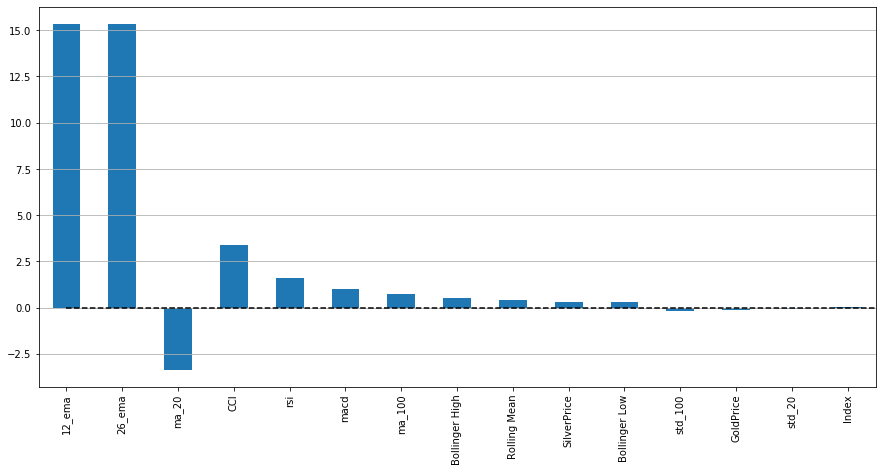

In [46]:
plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

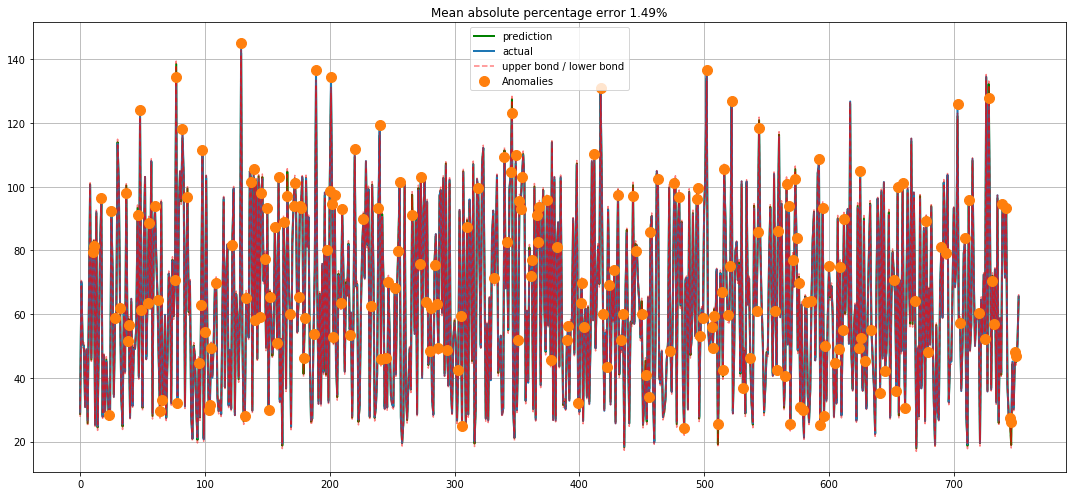

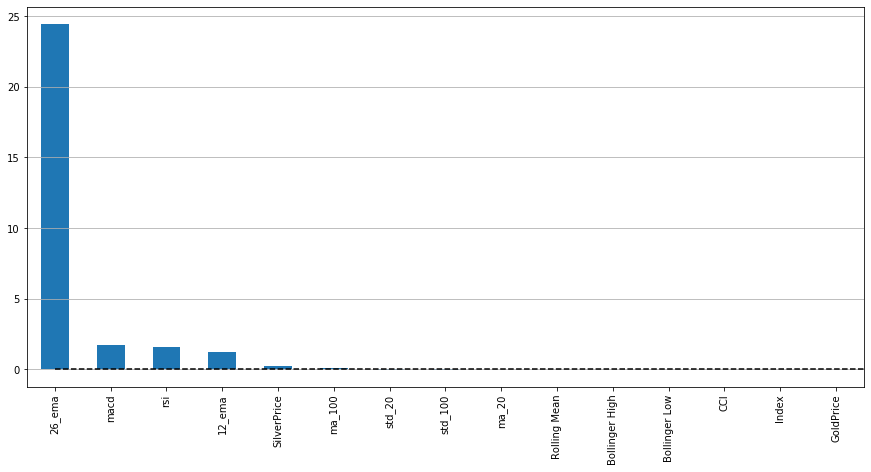

In [48]:
lasso = LassoCV(cv=5)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

### IQR for each column

In [55]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ma_20              42.961375
ma_100             42.969000
std_20              1.382856
std_100             2.784086
rsi                17.319540
Rolling Mean       43.142857
Bollinger High     44.209550
Bollinger Low      41.685237
26_ema             43.164264
12_ema             42.701487
macd                1.671308
CCI               108.559658
Index             821.125000
GoldPrice         917.200000
SilverPrice        11.149500
dtype: float64


In [79]:
Q1 = A.quantile(0.25)
Q3 = A.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CrudeOilPrice      42.660000
ma_20              43.343000
ma_100             43.938400
std_20              1.376289
std_100             2.803624
rsi                17.198580
Rolling Mean       43.472857
Bollinger High     44.505208
Bollinger Low      42.164793
26_ema             43.358796
12_ema             43.263639
macd                1.658769
CCI               109.523991
Index             813.375000
GoldPrice         916.200000
SilverPrice        11.139500
dtype: float64


## Removing outliers

In [81]:
A.shape

(5019, 16)

In [80]:
A_out = A[~((A < (Q1 - 1.5 * IQR)) |(A > (Q3 + 1.5 * IQR))).any(axis=1)]
A_out.shape

(4410, 16)

In [82]:
y = A_out.CrudeOilPrice
X = A_out.drop(columns = ['CrudeOilPrice'])

In [85]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X, y, test_size=0.15, random_state=101)
print('length of X_train_out and X_test_out: ', len(X_train_out), len(X_test_out))
print('length of y_train_out and y_test_out: ', len(y_train_out), len(y_test_out))

length of X_train_out and X_test_out:  3748 662
length of y_train_out and y_test_out:  3748 662


In [76]:
X_train_out = X_train[~((X_train < (Q1 - 1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
X_train_out.shape

(3759, 15)

In [73]:
X_train.shape

(4075, 15)

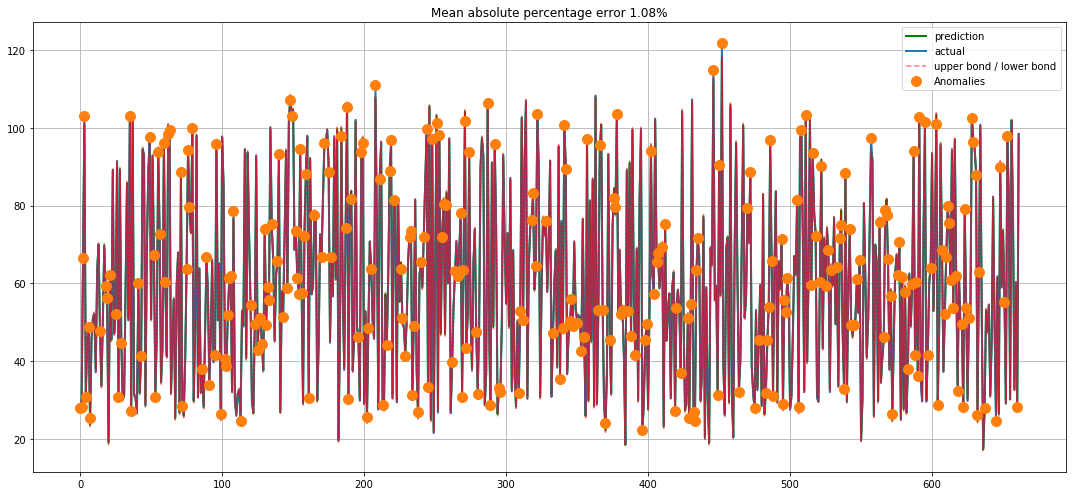

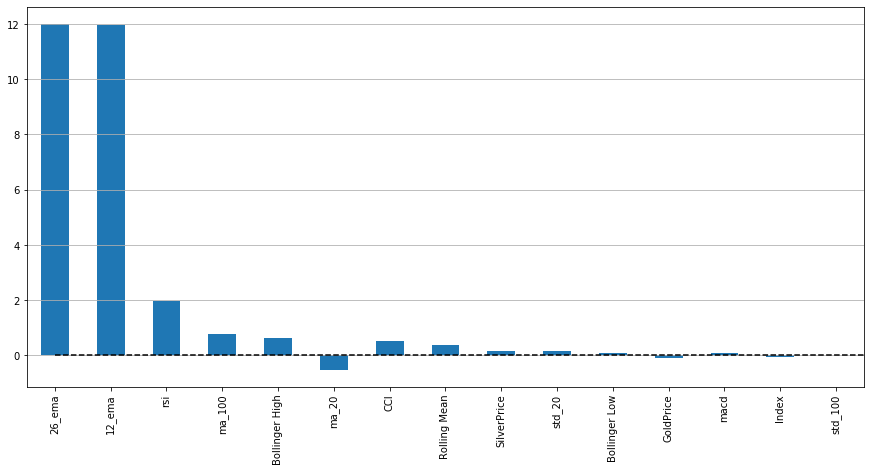

In [88]:
X_train_out_scaled = scaler.fit_transform(X_train_out)
X_test_out_scaled = scaler.transform(X_test_out)

ridge = RidgeCV(cv=5)
ridge.fit(X_train_out_scaled, y_train_out)

plotModelResults(ridge, X_train_out_scaled, X_test_out_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:20:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:20:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:20:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:20:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:20:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:20:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


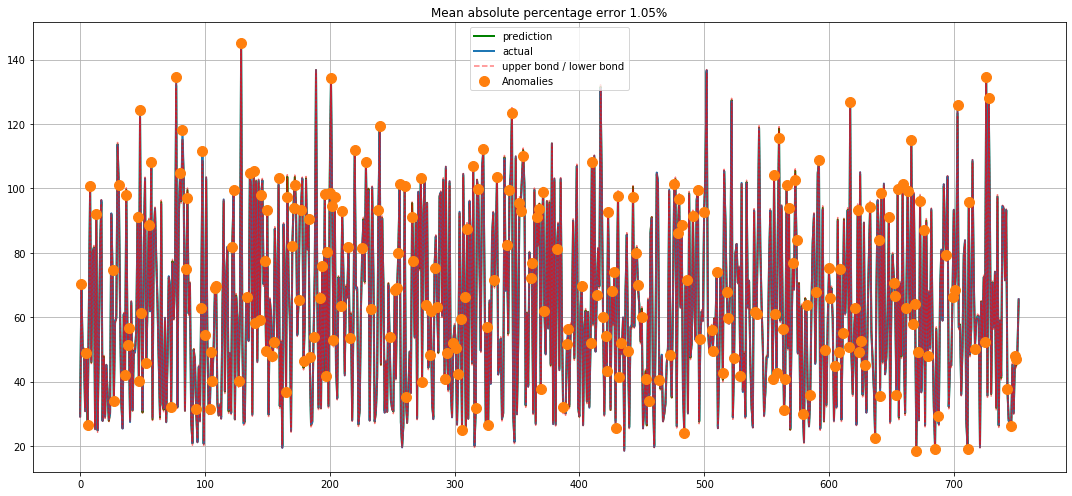

In [49]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)

In [52]:
import xgboost
# Let's try XGboost algorithm to see if we can get better results
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:29:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [97]:
print(xgb.feature_importances_)

[3.6880738e-05 2.9931965e-04 7.0694805e-05 2.7320147e-04 8.1773475e-04
 5.0105527e-04 7.0896541e-04 1.4191261e-03 1.1356921e-03 9.9411649e-01
 2.4480472e-04 0.0000000e+00 1.6863069e-04 8.5779939e-05 1.2165639e-04]


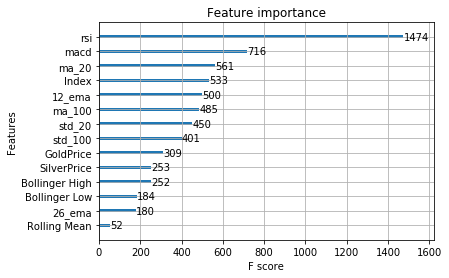

In [101]:
from xgboost import plot_importance
from matplotlib import pyplot
# plot feature importance
plot_importance(xgb)
pyplot.show()

In [106]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   21.4s finished
C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.999487554435028
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [54]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.9995556635980702


In [107]:
y_pred = xgb_grid.predict(X_test)

import sklearn.metrics
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error, median_absolute_error
mae = mean_absolute_error(y_pred=y_pred, y_true=y_test)
mse = mean_squared_error(y_pred=y_pred, y_true=y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred=y_pred, y_true=y_test)

print('MAE',mae)
print('MSE',mse)
print('RMSE', rmse)
print('R2',r2)

MAE 0.3115535294685481
MSE 0.20963468428835463
RMSE 0.45785880387773986
R2 0.9996354310449195


In [146]:
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import neighbors

n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train,y_train)
y1_knn=knn.predict(X_train)
y1_knn=list(y1_knn)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_knn[i]-y_train[i])/y_train[i])
train_error_knn=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_knn)+" percent"+" in Knn algorithm")

y2_knn=knn.predict(X_test)
y2_knn=list(y2_knn)
error=0
for i in range(len(y_test)):
    error+=(abs(y2_knn[i]-y_test[i])/y_test[i])
test_error_knn=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_knn)+" percent"+" in knn algorithm")

Train error = 1.381641239505601 percent in Knn algorithm
Test error = 1.833847660129317 percent in knn algorithm


In [148]:
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
y1_dec=dec.predict(X_train)
y1_dec=list(y1_dec)
y2_dec=dec.predict(X_test)
y2_dec=list(y2_dec)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_dec[i]-y_train[i])/y_train[i])
train_error_tree=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_tree)+" percent"+" in Decision Tree Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y1_dec[i]-y_test[i])/y_test[i])
test_error_tree=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_tree)+" percent in Decision Tree Regressor")

Train error = 25.04926346803178 percent in Decision Tree Regressor
Test error = 49.48978357630997 percent in Decision Tree Regressor


In [151]:
from sklearn import svm
svm_reg=svm.SVR(gamma='auto')
svm_reg.fit(X_train,y_train)
y1_svm=svm_reg.predict(X_train)
y1_svm=list(y1_svm)
y2_svm=svm_reg.predict(X_test)
y2_svm=list(y2_svm)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_svm[i]-y_train[i])/y_train[i])
train_error_svm=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in SVM Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_svm[i]-y_test[i])/y_test[i])
test_error_svm=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_svm)+" percent in SVM Regressor")

Train error = 42.076144663465165 percent in SVM Regressor
Test error = 41.052392434305055 percent in SVM Regressor


In [156]:
y1_xgb=xgb.predict(X_train)
y1_xgb=list(y1_xgb)
y2_xgb=xgb.predict(X_test)
y2_xgb=list(y2_xgb)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_xgb[i]-y_train[i])/y_train[i])
train_error_xgb=error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_svm)+" percent"+" in XGB Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_xgb[i]-y_test[i])/y_test[i])
test_error_xgb=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_xgb)+" percent in XGB Regressor")

Train error = 42.076144663465165 percent in XGB Regressor
Test error = 0.41024121650595735 percent in XGB Regressor


In [162]:
from sklearn.model_selection import cross_val_predict
rf_reg = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_reg.fit(X_train,y_train)
y1_rf = rf_reg.predict(X_train)
y1_rf = list(y1_rf)
y2_rf = rf_reg.predict(X_test)
y2_rf = list(y2_rf)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_rf[i]-y_train[i])/y_train[i])
train_error_rf =error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_rf)+" percent"+" in RF Regressor")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_rf[i]-y_test[i])/y_test[i])
test_error_rf=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_rf)+" percent in RF Regressor")

Train error = 0.2745654066470375 percent in RF Regressor
Test error = 0.7865634220195403 percent in RF Regressor


In [165]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.objectives import MSE, MAE
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], output_dim=256))
model.add(Activation("tanh"))
model.add(Dropout(0.50))
model.add(Dense(output_dim=128))
model.add(Activation("relu"))
model.add(Dropout(0.50))
model.add(Dense(output_dim=64))
model.add(Activation("relu"))
model.add(Dropout(0.50))
model.add(Dense(output_dim=1))
model.compile("nadam", "mae")

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
train_log = model.fit(X_train, y_train.values, batch_size=256, nb_epoch=200, 
                      validation_split=0.1, verbose=2, callbacks=[early_stopping])

pred_y = model.predict(X_test)

y1_model = model.predict(X_train)
y1_model = list(y1_model)
y2_model = model.predict(X_test)
y2_model = list(y2_model)

error=0
for i in range(len(y_train)):
    error+=(abs(y1_model[i]-y_train[i])/y_train[i])
train_error_model =error/len(y_train)*100
print("Train error = "+'{}'.format(train_error_model)+" percent"+" in DNN")

error=0
for i in range(len(y_test)):
    error+=(abs(y2_model[i]-y_test[i])/y_test[i])
test_error_model=error/len(y_test)*100
print("Test error = "'{}'.format(test_error_model)+" percent in DNN")

Using TensorFlow backend.
W0909 17:19:29.641265 25812 deprecation_wrapper.py:119] From C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=15, units=256)`
  import sys
W0909 17:19:29.683307 25812 deprecation_wrapper.py:119] From C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0909 17:19:29.690288 25812 deprecation_wrapper.py:119] From C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0909 17:19:29.710235 25812 deprecation_

Train on 3373 samples, validate on 375 samples
Epoch 1/200
 - 0s - loss: 38.4834 - val_loss: 18.3953
Epoch 2/200
 - 0s - loss: 20.8259 - val_loss: 13.8157
Epoch 3/200
 - 0s - loss: 16.5954 - val_loss: 10.2400
Epoch 4/200
 - 0s - loss: 15.1741 - val_loss: 9.6805
Epoch 5/200
 - 0s - loss: 14.7951 - val_loss: 8.9075
Epoch 6/200
 - 0s - loss: 14.4239 - val_loss: 8.3947
Epoch 7/200
 - 0s - loss: 14.7676 - val_loss: 7.8449
Epoch 8/200
 - 0s - loss: 13.8042 - val_loss: 8.2045
Epoch 9/200
 - 0s - loss: 14.2178 - val_loss: 8.5256
Epoch 10/200
 - 0s - loss: 13.8337 - val_loss: 7.8708
Epoch 11/200
 - 0s - loss: 13.5722 - val_loss: 9.0747
Epoch 12/200
 - 0s - loss: 13.5913 - val_loss: 8.0907
Epoch 13/200
 - 0s - loss: 13.5378 - val_loss: 9.4803
Epoch 14/200
 - 0s - loss: 13.6758 - val_loss: 11.4466
Epoch 15/200
 - 0s - loss: 14.2600 - val_loss: 9.6793
Epoch 16/200
 - 0s - loss: 13.6872 - val_loss: 8.3279
Epoch 17/200
 - 0s - loss: 13.7389 - val_loss: 9.5481
Train error = [15.975179] percent in DNN

In [166]:
from pandas import DataFrame,Series
train_error=[train_error_knn,train_error_tree,train_error_svm, train_error_xgb, train_error_rf, train_error_model]
test_error=[test_error_knn,test_error_tree,test_error_svm, test_error_xgb, test_error_rf, test_error_model]

col={'Train Error':train_error,'Test Error':test_error}
models=['kNearestNeighbour','Decision Tree','SupportVector', 'GBM', 'RandomForest', 'DNN']
df=DataFrame(data=col,index=models)
df

,Train Error,Test Error
kNearestNeighbour,1.38164,1.83385
Decision Tree,25.0493,49.4898
SupportVector,42.0761,41.0524
GBM,0.409122,0.410241
RandomForest,0.274565,0.786563
DNN,[15.975179],[15.754755]


In [41]:
import xgboost as xgb

In [25]:
import h2o

In [28]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Sarit\AppData\Local\Temp\tmpvx845830
  JVM stdout: C:\Users\Sarit\AppData\Local\Temp\tmpvx845830\h2o_Sarit_started_from_python.out
  JVM stderr: C:\Users\Sarit\AppData\Local\Temp\tmpvx845830\h2o_Sarit_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Singapore
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_Sarit_uhipsk
H2O cluster total nodes:,1
H2O cluster free memory:,1.747 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [69]:
B = pd.DataFrame (DATA['GoldPrice'])

In [58]:
from ta import *

In [71]:
B['ma_20'] = B.GoldPrice.rolling(window=20).mean().fillna(0)
B['ma_100'] = B.GoldPrice.rolling(window=100).mean().fillna(0)

B['std_20'] = DATA.GoldPrice.rolling(window=20).std().fillna(0)
B['std_100'] = DATA.GoldPrice.rolling(window=100).std().fillna(0)

B['rsi'] = RSI(DATA.GoldPrice, timeperiod=14).fillna(0)

In [74]:
#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = DATA['GoldPrice'].rolling(window).mean()
rolling_std = DATA['GoldPrice'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
B['Rolling Mean'] = rolling_mean.fillna(0)
B['Bollinger High'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
B['Bollinger Low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)

In [60]:
# Add bollinger band high indicator filling Nans values
#B['bb_high_indicator'] = bollinger_hband_indicator(DATA.GoldPrice, n=20, ndev=2, fillna=True)
# Add bollinger band low indicator filling Nans values
#B['bb_low_indicator'] = bollinger_lband_indicator(DATA.GoldPrice, n=20, ndev=2,fillna=True)

In [77]:
B['26_ema'] = DATA.GoldPrice.ewm(span=26).mean().fillna(0)
B['12_ema'] = DATA.GoldPrice.ewm(span=12).mean().fillna(0)

B['macd'] = B['12_ema'] - B['26_ema']

B['CCI'] = (DATA['GoldPrice'].mean() - DATA['GoldPrice'].rolling(window=20).mean().fillna(0)) /(0.015 * 26.382652)

B['Index'] = DATA['Index']
B['CrudeOilPrice'] = DATA ['CrudeOilPrice']
B["SilverPrice"] = DATA['SilverPrice']
B.head()

,GoldPrice,ma_20,ma_100,std_20,std_100,rsi,Rolling Mean,Bollinger High,Bollinger Low,26_ema,12_ema,macd,CCI,Index,CrudeOilPrice,SilverPrice
Date,,,,,,,,,,,,,,,,
2000-01-04,282.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.700000,282.700000,0.000000,2396.233508,1411.75,25.55,5.335
2000-01-05,281.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.869231,281.833333,-0.035897,2396.233508,1413.50,24.91,5.170
2000-01-06,281.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.700641,281.664203,-0.036437,2396.233508,1404.00,24.78,5.127
2000-01-07,281.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.756373,281.738635,-0.017738,2396.233508,1460.50,24.22,5.150
2000-01-10,281.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281.743300,281.728138,-0.015162,2396.233508,1475.00,24.67,5.145


In [78]:
B.to_csv('B.csv', index=False)

In [29]:
C = pd.DataFrame (DATA['SilverPrice'])

In [30]:
C['ma_20'] = DATA.SilverPrice.rolling(window=20).mean().fillna(0)
C['ma_100'] = DATA.SilverPrice.rolling(window=100).mean().fillna(0)

C['std_20'] = DATA.SilverPrice.rolling(window=20).std().fillna(0)
C['std_100'] = DATA.SilverPrice.rolling(window=100).std().fillna(0)

C['rsi'] = RSI(DATA.SilverPrice, timeperiod=14).fillna(0)

In [24]:
from ta import *

In [32]:
# Add bollinger band high indicator filling Nans values
#C['bb_high_indicator'] = bollinger_hband_indicator(DATA.SilverPrice, n=20, ndev=2, fillna=True)
# Add bollinger band low indicator filling Nans values
#C['bb_low_indicator'] = bollinger_lband_indicator(DATA.SilverPrice, n=20, ndev=2,fillna=True)

#Set number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
window = 21
no_of_std = 2
#Calculate rolling mean and standard deviation using number of days set above
rolling_mean = DATA['SilverPrice'].rolling(window).mean()
rolling_std = DATA['SilverPrice'].rolling(window).std()
#create two new DataFrame columns to hold values of upper and lower Bollinger bands
C['Rolling Mean'] = rolling_mean.fillna(0)
C['Bollinger High'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
C['Bollinger Low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)

C['26_ema'] = DATA.SilverPrice.ewm(span=26).mean().fillna(0)
C['12_ema'] = DATA.SilverPrice.ewm(span=12).mean().fillna(0)

C['macd'] = C['12_ema'] - C['26_ema']

C['CCI'] = (DATA['SilverPrice'].mean() - DATA['SilverPrice'].rolling(window=20).mean().fillna(0)) /(0.015 * 26.382652)

C['Index'] = DATA['Index']
C['CrudeOilPrice'] = DATA ['CrudeOilPrice']
C["GoldPrice"] = DATA['GoldPrice']
C.head()



,SilverPrice,ma_20,ma_100,std_20,std_100,rsi,Rolling Mean,Bollinger High,Bollinger Low,26_ema,12_ema,macd,CCI,Index,CrudeOilPrice,GoldPrice
Date,,,,,,,,,,,,,,,,
2000-01-04,5.335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.335000,5.335000,0.000000,37.739279,1411.75,25.55,282.7
2000-01-05,5.170,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.249327,5.245625,-0.003702,37.739279,1413.50,24.91,281.1
2000-01-06,5.127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.205376,5.199326,-0.006050,37.739279,1404.00,24.78,281.4
2000-01-07,5.150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.189895,5.183755,-0.006140,37.739279,1460.50,24.22,281.9
2000-01-10,5.145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.179484,5.173226,-0.006258,37.739279,1475.00,24.67,281.7


In [33]:
C.to_csv('C.csv', index=False)

In [21]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_val_score

In [22]:
A.head()

,CrudeOilPrice,ma_20,ma_100,std_20,std_100,rsi,bb_high_indicator,bb_low_indicator
Date,,,,,,,,
2000-01-04,25.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,24.91,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-06,24.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-07,24.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-10,24.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.221-b11, mixed mode)
  Starting server from C:\Users\Sarit\Anaconda3\envs\tensorflow\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Sarit\AppData\Local\Temp\tmpm5kn4lld
  JVM stdout: C:\Users\Sarit\AppData\Local\Temp\tmpm5kn4lld\h2o_Sarit_started_from_python.out
  JVM stderr: C:\Users\Sarit\AppData\Local\Temp\tmpm5kn4lld\h2o_Sarit_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Singapore
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.3
H2O cluster version age:,6 days
H2O cluster name:,H2O_from_python_Sarit_68k1fg
H2O cluster total nodes:,1
H2O cluster free memory:,1.747 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"
